# 1. Introducción
### Objetivo del Proyecto

Este proyecto busca explorar el papel que ha tenido la ciencia de datos y la inteligencia artificial (IA) en el desarrollo y la estrategia en la Fórmula 1, con el fin de abordar dos ideas comunes:

1. Que las IA son una tecnología "nueva" dentro del deporte.
2. Que los datos han convertido la Fórmula 1 en un deporte predecible, restando valor al factor humano y a la causalidad de eventos en carrera.

La hipótesis es que la ciencia de datos ha sido un pilar en la evolución del rendimiento de los monoplazas desde hace décadas, y que la IA, aunque más reciente como término popular, se basa en metodologías estadísticas y de modelado que ya eran utilizadas. Además, se analizará la relación entre predicción y causalidad en eventos impredecibles como la lluvia.


# Análisis Exploratorio
### Fuentes de Datos

- API de FastF1
- Datos Obtenidos del portal de Github de toUpperCase78
- Datos de posición por vuelta, estrategias de neumáticos, paradas en pits, etc.

### Exploración Inicial

- Número de temporadas analizadas
- Principales variables: equipos, pilotos, tiempos, clima, incidentes


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


1. importacion de datos

In [ ]:
df_f1_2022_2024 = pd.read_csv('/content/sample_data/f1_2022_2024_clean.csv')
display(df_f1_2022_2024.head())

,Track,Position,No_x,Driver,Team,Starting Grid,Laps,Time/Retired,Points_x,+1 Pt,...,Laps_Qualify,Position_Sprint,No_Sprint,Starting Grid_Sprint,Laps_Sprint,Time/Retired_Sprint,Points,Season,Set Fastest Lap,Fastest Lap Time
0,Bahrain,1,16,Charles Leclerc,Ferrari,1,57,1:37:33.584,26,Yes,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN
1,Bahrain,2,55,Carlos Sainz,Ferrari,3,57,+5.598,18,No,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN
2,Bahrain,3,44,Lewis Hamilton,Mercedes,5,57,+9.675,15,No,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN
3,Bahrain,4,63,George Russell,Mercedes,9,57,+11.211,12,No,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN
4,Bahrain,5,20,Kevin Magnussen,Haas Ferrari,7,57,+14.754,10,No,...,12.0,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN


### Evolución de la Dominancia en la F1

- Comparar épocas: Schumacher-Ferrari, Vettel-Red Bull, Hamilton-Mercedes, Verstappen-Red Bull
- ¿Qué tan predecibles eran las temporadas por rendimiento?

### Correlación entre variables técnicas y resultados

- ¿Cambios técnicos afectan resultados?
- ¿Cuánto influyen decisiones de estrategia, clima, y safety car?


1. Análisis de Predictibilidad por Er


In [ ]:
df_f1_2022_2024.groupby(['Season', 'Team'])['Points'].sum().reset_index()

,Season,Team,Points
0,2022,Alfa Romeo Ferrari,2.0
1,2022,AlphaTauri RBPT,0.0
2,2022,Alpine Renault,3.0
3,2022,Aston Martin Aramco Mercedes,0.0
4,2022,Ferrari,35.0
5,2022,Haas Ferrari,4.0
6,2022,McLaren Mercedes,9.0
7,2022,Mercedes,20.0
8,2022,Red Bull Racing RBPT,35.0
9,2022,Williams Mercedes,0.0


# Dominancia por Temporada: Puntos Totales por Equipo (2022–2024)
Este gráfico representa la suma total de puntos obtenidos por cada equipo en las temporadas 2022, 2023 y 2024. A través de esta visualización, se busca:
- Comparar la evolución del rendimiento entre escuderías dominantes y emergentes.
- Identificar fracturas en la hegemonía técnica, como el declive de Mercedes o el ascenso de McLaren.
- Explorar cómo los datos básicos pueden revelar patrones de supremacía, sin necesidad de modelos complejos.


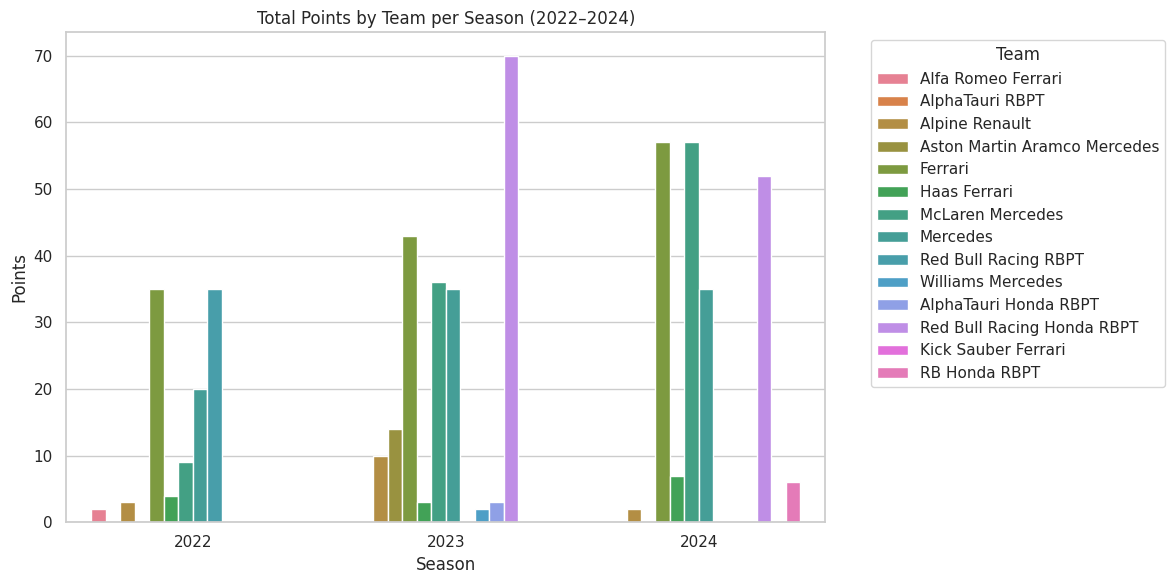

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_summary = df_f1_2022_2024.groupby(['Season', 'Team'])['Points'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=df_summary, x='Season', y='Points', hue='Team')
plt.title('Total Points by Team per Season (2022–2024)')
plt.ylabel('Points')
plt.xlabel('Season')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

2. convertir en float

In [ ]:
def time_to_seconds(t):
    try:
        m, s = t.split(':')
        return int(m) * 60 + float(s)
    except:
        return None  # o np.nan si prefieres

# Aplicar la conversión
for col in ['Q1', 'Q2', 'Q3']:
    df_f1_2022_2024[col] = df_f1_2022_2024[col].apply(time_to_seconds)

3. verificacion de nulos

In [ ]:
X = df_f1_2022_2024[['Starting Grid', 'Q1', 'Q2', 'Q3']].dropna()
y = df_f1_2022_2024.loc[X.index, 'Position']

4. Identificar valores no numérico


In [ ]:
df_f1_2022_2024['Position'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', 'NC', '20', 'DQ'],
      dtype=object)

5. Filtrar solo posiciones válida

In [ ]:
df_clean = df_f1_2022_2024[df_f1_2022_2024['Position'].str.isnumeric()]
df_clean['Position'] = df_clean['Position'].astype(int)

/tmp/ipython-input-12-1760928023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Position'] = df_clean['Position'].astype(int)


6. Reentrenar el modelo Correlación Técnica vs. Resultad


In [ ]:
X = df_clean[['Starting Grid', 'Q1', 'Q2', 'Q3']].dropna()
y = df_clean.loc[X.index, 'Position']
model = LinearRegression().fit(X, y)

 2. Correlación Técnica vs. Resultad


# 4. Ciencia de Datos e IA en la F1
### ¿Desde cuándo se aplica ciencia de datos en la F1?

- Uso de simulaciones CFD, túneles de viento, sensores y telemetría desde los años 90s.
- Ejemplo: cómo Williams o McLaren usaban análisis de datos antes del auge de la IA.

### IA en la F1 actual

- Modelos predictivos para estrategia de neumáticos y pits.
- Sistemas de machine learning que predicen degradación, accidentes, etc.

#### ➕ Bonus: Simulación básica de una estrategia con ML

- Predecir vuelta ideal para entrar a pits o comportamiento del safety car.


1. APIs

In [ ]:
pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-spark-connect 0.8.3 requires websockets>=14.0, but you have websockets 13.1 which is incompatible.


1.2 test

In [ ]:
import os
import fastf1

# Crear carpeta si no existe
cache_path = './fastf1_cache'
os.makedirs(cache_path, exist_ok=True)

# Habilitar caché
fastf1.Cache.enable_cache(cache_path)

In [ ]:
session = fastf1.get_session(2023, 'Monaco', 'R')  # 'R' = Race
session.load()

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Monaco Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
DEBUG:fastf1.ergast:Failed to parse timestamp '-1:53:44.819' in Ergastresponse.
req            INFO 	No cached data found for session_status_data. Lo

2. Modelo

In [ ]:
laps = session.laps.pick_drivers(['VER', 'HAM', 'ALO'])  # ejemplo: pilotos específicos
laps = laps.loc[laps['PitInTime'].notna()]  # solo vueltas con parada

# Crear variables útiles
laps['LapNumber'] = laps['LapNumber']
laps['Compound'] = laps['Compound']
laps['TrackStatus'] = laps['TrackStatus']  # incluye SC, bandera roja, etc.
laps['Position'] = laps['Position']
laps['Time'] = laps['LapTime'].dt.total_seconds()

/tmp/ipython-input-18-2366300733.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['LapNumber'] = laps['LapNumber']
/tmp/ipython-input-18-2366300733.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['Compound'] = laps['Compound']
/tmp/ipython-input-18-2366300733.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
laps.loc[:, 'Time'] = laps['LapTime'].dt.total_seconds()

# codificacion

In [ ]:
laps = laps.copy()  # Esto elimina el warning en todas las asignaciones posteriores

In [ ]:
from sklearn.preprocessing import LabelEncoder
laps['Compound_encoded'] = le.fit_transform(laps['Compound'])
laps['TrackStatus_encoded'] = le.fit_transform(laps['TrackStatus'].astype(str))

Entrenar modelo

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = laps[['LapNumber', 'Compound_encoded', 'TrackStatus_encoded', 'Position']]
y = laps['Time']  # tiempo de vuelta como proxy de rendimiento

model = RandomForestRegressor().fit(X, y)

Simular estrategia

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Entrenar con todos los compuestos posibles
all_compounds = ['SOFT', 'MEDIUM', 'HARD', 'INTERMEDIATE', 'WET']
compound_encoder = LabelEncoder()
compound_encoder.fit(all_compounds)

# Entrenar con todos los estados posibles de pista
all_track_status = ['1', '2', '3', '4', '5']  # SC, bandera roja, VSC, etc.
track_status_encoder = LabelEncoder()
track_status_encoder.fit(all_track_status)

# Aplicar codificación al dataset
laps['Compound_encoded'] = compound_encoder.transform(laps['Compound'])
laps['TrackStatus_encoded'] = track_status_encoder.transform(laps['TrackStatus'].astype(str))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = laps[['LapNumber', 'Compound_encoded', 'TrackStatus_encoded', 'Position']]
y = laps['Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor().fit(X_train, y_train)

Simular estrategia

In [ ]:
lap_sim = pd.DataFrame({
    'LapNumber': [15],
    'Compound_encoded': [compound_encoder.transform(['SOFT'])[0]],
    'TrackStatus_encoded': [track_status_encoder.transform(['1'])[0]],  # SC
    'Position': [3]
})

predicted_time = model.predict(lap_sim)
print(f"⏱️ Tiempo estimado en vuelta 15 con SC y Soft: {predicted_time[0]:.2f} segundos")

⏱️ Tiempo estimado en vuelta 15 con SC y Soft: 113.92 segundos


Validacion

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = laps[['LapNumber', 'Compound_encoded', 'TrackStatus_encoded', 'Position']]
y = laps['Time']  # tiempo de vuelta como proxy de rendimiento

model = RandomForestRegressor().fit(X, y)

metricas rendimiento

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 12.379320000000035
MSE: 153.24756366240086
R²: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Conclusiones
MAE: En promedio, el modelo se equivoca por 12.38 segundos en cada vuelta
MSE: Penaliza errores grandes; indica que hay algunas predicciones muy desviadas
R^2: El modelo no puede explicar la variabilidad — probablemente por datos mal formateados, constantes o nulos en y_test

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


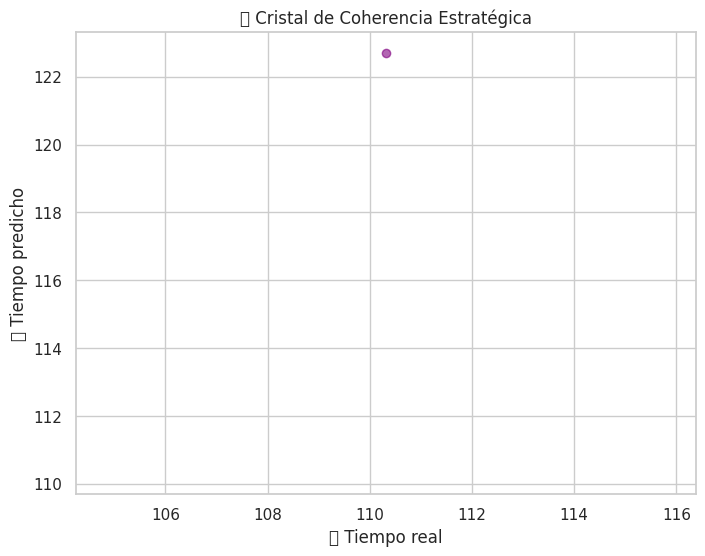

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel("⏱️ Tiempo real")
plt.ylabel("🔮 Tiempo predicho")
plt.title("📊 Cristal de Coherencia Estratégica")
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de variables técnicas
features = ['LapNumber', 'Compound_encoded', 'TrackStatus_encoded', 'Position', 'Time']
corr_matrix = laps[features].corr()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


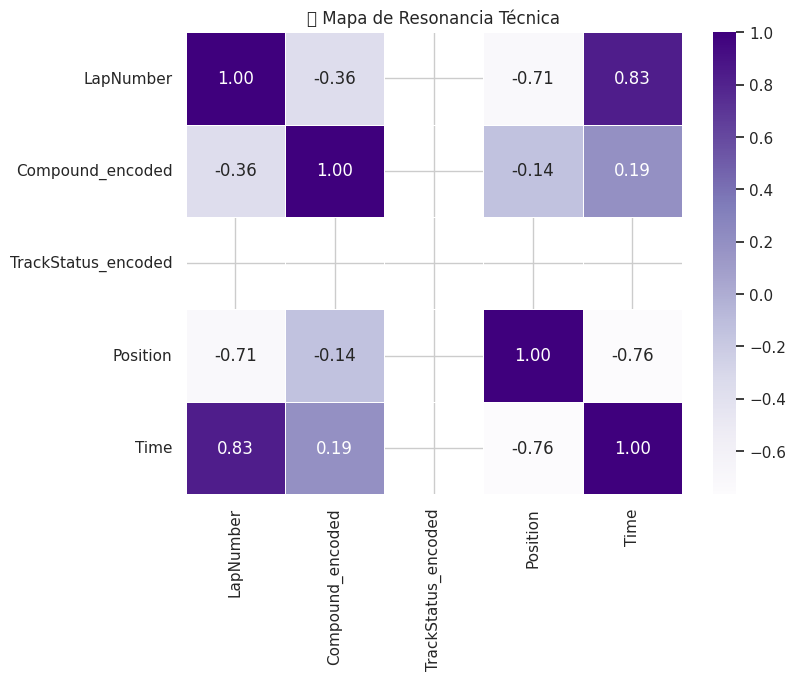

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt=".2f", linewidths=0.5)
plt.title("🔮 Mapa de Resonancia Técnica")
plt.show()

# 5. Causalidad vs Correlación
### Lo que los datos *no* pueden prever

- Ejemplos de carreras con lluvia: Silverstone 2008, Brasil 2016, Spa 2021.
- Factores como errores humanos, clima, fallas técnicas.

### Discusión

- ¿Los datos controlan el deporte o simplemente lo explican mejor?
- ¿Qué papel sigue teniendo el piloto, el ingeniero y la incertidumbre?

#### Reflexión:
> Decir que los datos controlan todo es ignorar que hay causalidad y aleatoriedad no modelada. Los datos ayudan a entender, pero no a dominar el caos del deporte.


# 6. Conclusiones
- La ciencia de datos ha estado presente desde hace décadas, y la IA moderna es una evolución de esos métodos.
- Los datos mejoran la toma de decisiones, pero no garantizan control total.
- El espectáculo de la F1 sigue siendo humano, técnico y caótico.
- algunos factoresd como el correr en una pista nueva podria generar mas accidentes y por ende mas safety car. como paso en el GP de arabia saudi en su primera edición.

# 7. Bibliografía / Referencias
## Enlaces a datasets usados
- https://github.com/toUpperCase78/formula1-datasets?utm_source=chatgpt.com
## Documentación de APIs como ergast o FastF1
- https://docs.fastf1.dev/